In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import tensorflow
from tensorflow import keras


In [26]:
df=pd.read_csv('Churn_Modelling.csv')

In [27]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8594,8595,15672930,Palerma,722,Spain,Male,37,9,0.00,2,1,0,31921.95,0
5576,5577,15635964,Eve,566,Germany,Male,65,4,120100.41,1,1,0,107563.16,1
7741,7742,15634501,Wei,441,France,Male,60,1,140614.15,1,0,1,174381.23,0
2302,2303,15736656,H?,723,France,Female,49,4,0.00,2,0,1,89972.25,0
1074,1075,15682618,Jamieson,535,France,Female,31,7,111855.04,2,1,1,36278.89,0


In [28]:
# 1 means customer leave
# 0 means customer stayed in bank

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
df.duplicated().sum()

0

In [31]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [32]:
# chek how many customer have leave the bank and how many remains

In [33]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [34]:
#Checking how many categories does gepgraphy column has

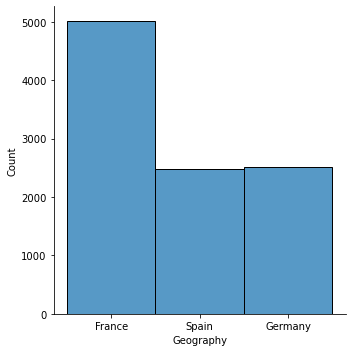

In [35]:
sns.displot(df['Geography'],)

In [36]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [37]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [38]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [39]:
X=df.drop(columns='Exited')

In [40]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [41]:
Y=df['Exited']

In [42]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=43)

In [44]:
X_train.shape

(8000, 11)

In [45]:
X_test.shape

(2000, 11)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [49]:
X_train_scaled

array([[ 1.5178518 , -0.85641715, -1.03980536, ..., -0.57715782,
        -0.57850497,  0.90134069],
       [ 1.0209782 , -0.28681727, -0.3490769 , ..., -0.57715782,
         1.72859362,  0.90134069],
       [ 2.02507693, -0.09695065, -1.03980536, ..., -0.57715782,
         1.72859362, -1.1094584 ],
       ...,
       [ 0.48269847, -1.14121709, -1.03980536, ...,  1.73262835,
        -0.57850497, -1.1094584 ],
       [ 0.66902607,  0.56758255, -1.73053383, ..., -0.57715782,
         1.72859362,  0.90134069],
       [-0.27296346, -0.57161721,  1.03238003, ...,  1.73262835,
        -0.57850497,  0.90134069]])

In [50]:
X_test_scaled


array([[ 1.16699752,  0.43499092, -1.04964451, ...,  1.70925967,
        -0.55501754, -1.04396559],
       [ 0.38095604, -0.53683866,  1.382501  , ..., -0.58504861,
        -0.55501754,  0.95788598],
       [ 0.28787218,  3.35047966,  1.03505164, ..., -0.58504861,
        -0.55501754, -1.04396559],
       ...,
       [-0.53953991, -0.73120458,  1.03505164, ..., -0.58504861,
        -0.55501754,  0.95788598],
       [ 0.30855748,  0.14344205,  0.68760228, ..., -0.58504861,
        -0.55501754, -1.04396559],
       [-0.53953991,  0.72653979, -1.04964451, ..., -0.58504861,
         1.80174485,  0.95788598]])

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [75]:
 model=Sequential()

model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 36        
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [117]:
History=model.fit(X_train_scaled,y_train,epochs=40,validation_split=0.2)

Epoch 1/40
200/200 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8620 - val_loss: 0.3383 - val_accuracy: 0.8600
Epoch 2/40
200/200 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8637 - val_loss: 0.3373 - val_accuracy: 0.8606
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8625 - val_loss: 0.3381 - val_accuracy: 0.8606
Epoch 4/40
200/200 [==============================] - 1s 3ms/step - loss: 0.3312 - accuracy: 0.8620 - val_loss: 0.3380 - val_accuracy: 0.8594
Epoch 5/40
200/200 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8642 - val_loss: 0.3378 - val_accuracy: 0.8625
Epoch 6/40
200/200 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8619 - val_loss: 0.3382 - val_accuracy: 0.8612
Epoch 7/40
200/200 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8634 - val_loss: 0.3386 - val_accuracy: 0.8612
Epoch 

In [118]:
model.layers[1].get_weights()

[array([[-1.3389822 , -0.15476047,  0.66401535],
        [ 0.30025545,  0.92595744, -0.35142645],
        [ 0.8520131 ,  0.01786546, -1.0606844 ]], dtype=float32),
 array([0.4548325 , 0.05048144, 1.5094641 ], dtype=float32)]

In [119]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [120]:
y_pred=np.where(y_log>0.5,1,0)

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(y_test,y_pred)

0.8625

In [123]:
History.history

{'loss': [0.33139124512672424,
  0.33151501417160034,
  0.33150622248649597,
  0.33121344447135925,
  0.33156174421310425,
  0.3314591646194458,
  0.3316783905029297,
  0.33172911405563354,
  0.3314526081085205,
  0.3314077854156494,
  0.33182811737060547,
  0.33148303627967834,
  0.3313525915145874,
  0.3313247561454773,
  0.33153048157691956,
  0.3318154215812683,
  0.3310107886791229,
  0.3317384421825409,
  0.3313358724117279,
  0.3312915861606598,
  0.3308134377002716,
  0.33196961879730225,
  0.33132240176200867,
  0.3315364122390747,
  0.33144640922546387,
  0.3313295841217041,
  0.3314725160598755,
  0.33145034313201904,
  0.3312964141368866,
  0.3314674496650696,
  0.3315383195877075,
  0.33122706413269043,
  0.33148518204689026,
  0.3311605751514435,
  0.3311300277709961,
  0.3315613567829132,
  0.3319462239742279,
  0.33103251457214355,
  0.3316240608692169,
  0.3314221203327179],
 'accuracy': [0.8620312213897705,
  0.8637499809265137,
  0.862500011920929,
  0.86203122138977

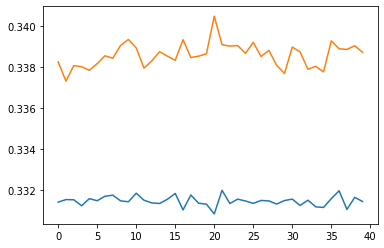

In [124]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])


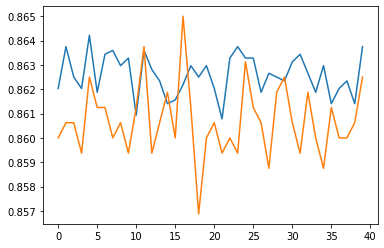

In [125]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])